In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import re
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("/workspaces/Kaggle-Mcdonalds/mcd.csv")
df.head()

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.10,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...


- Number of rows and columns

In [4]:
df.shape

(42, 16)

In [41]:
df.describe()

,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,327.503810,10.251667,13.980095,6.457143,0.125238,21.062619,39.231857,13.296905,9.305714,474.297857
std,206.453133,10.042711,11.748440,5.208211,0.111994,28.125409,21.680327,14.939201,12.297709,472.896404
min,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,176.622500,2.832500,5.790000,3.670000,0.060000,2.840000,23.632500,2.922500,1.080000,85.770000
50%,306.245000,6.335000,11.375000,5.065000,0.100000,6.585000,39.305000,8.565000,5.175000,309.770000
75%,401.737500,15.340000,18.807500,8.125000,0.175000,31.740000,51.207500,17.287500,12.902500,709.437500
max,832.670000,47.600000,46.900000,21.110000,0.590000,115.000000,117.780000,66.930000,55.160000,1854.710000


In [42]:
df.dtypes

name             object
serving_size     object
ingredients      object
tag              object
allergy          object
energy          float64
protein         float64
total_fat       float64
sat_fat         float64
trans_fat       float64
chol            float64
carbs           float64
total_sugar     float64
added_sugar     float64
sodium          float64
description      object
dtype: object

In [43]:
#df.columns
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,df[i].isnull().sum())

ingredients 6
tag 6


# Dropping null values
- df_new is the new data frame 

In [44]:
df_new = df.dropna() 

In [45]:
df_new.shape

(36, 16)

In [46]:
ingredients_word = ""
stopwords = set(STOPWORDS)
for val in df_new.ingredients:
    val = str(val)
    tokens  = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    ingredients_word +="".join(tokens)+""
wc_ingredients = WordCloud(width=800, height=800,background_color = 'white',stopwords = stopwords, min_font_size = 10).generate(ingredients_word)

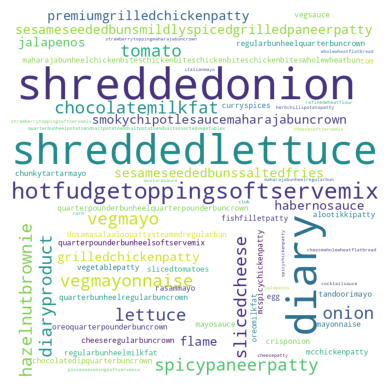

In [47]:
plt.imshow(wc_ingredients)
plt.axis("off")
plt.show()

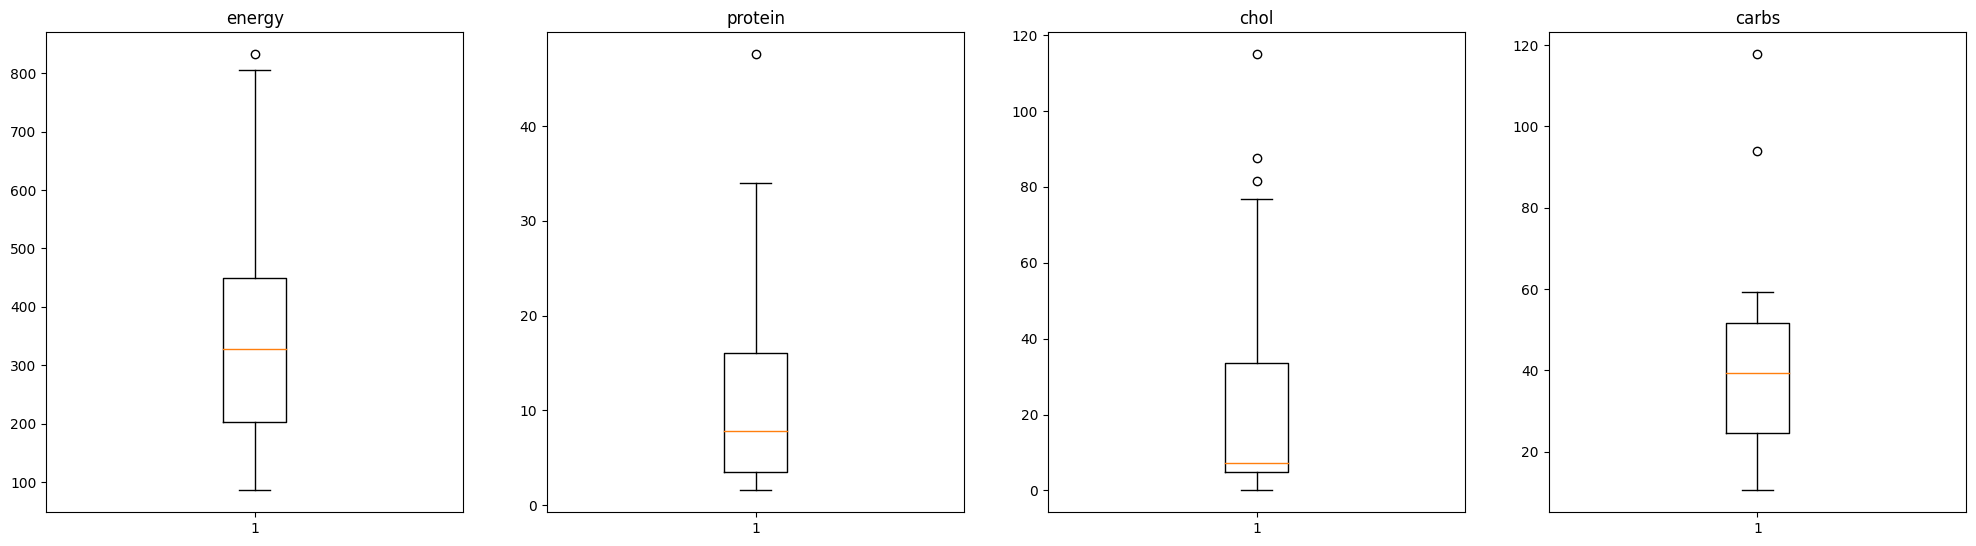

In [48]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("energy")
plt.boxplot(df_new["energy"])

plt.subplot(1,4,2)
plt.title("protein")
plt.boxplot(df_new["protein"])

plt.subplot(1,4,3)
plt.title("chol")
plt.boxplot(df_new["chol"])

plt.subplot(1,4,4)
plt.title("carbs")
plt.boxplot(df_new["carbs"])

plt.show()

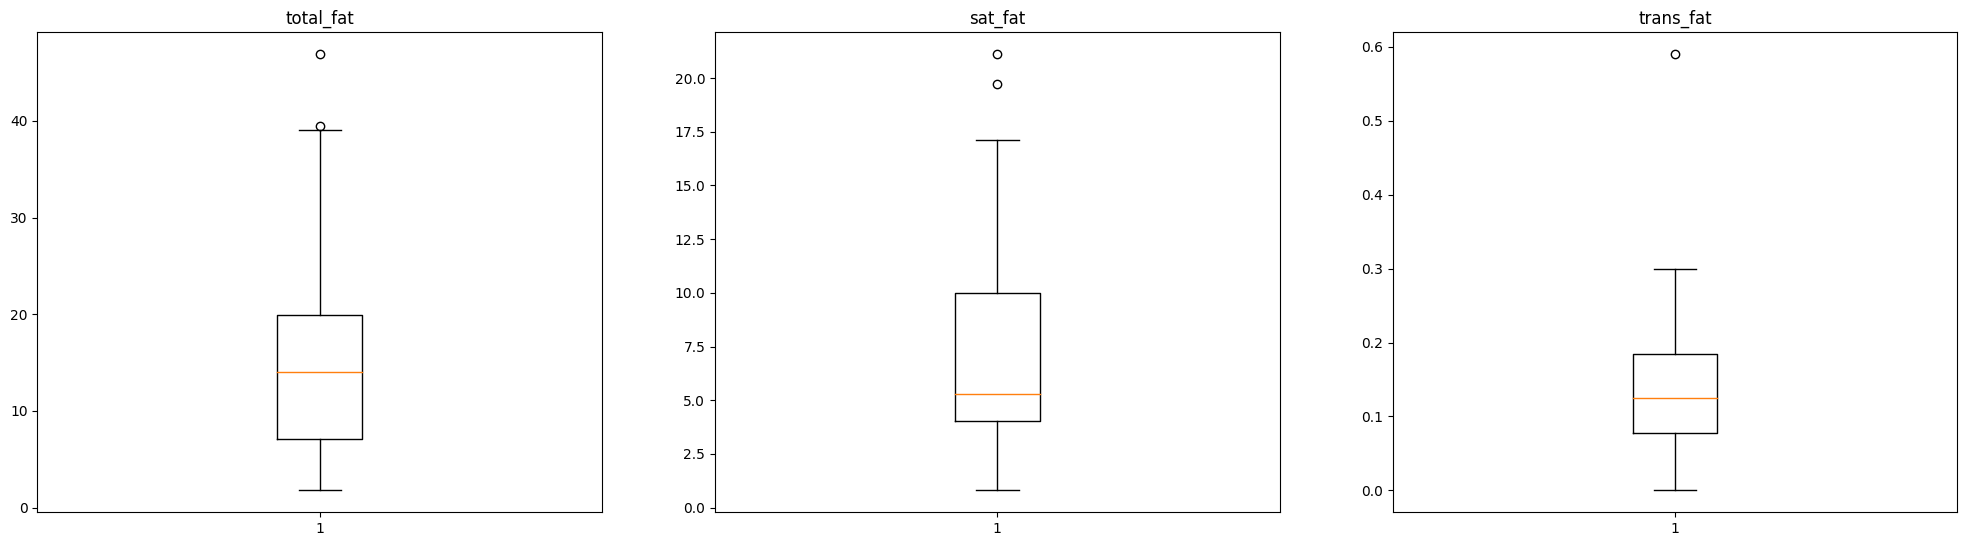

In [49]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("total_fat")
plt.boxplot(df_new["total_fat"])

plt.subplot(1,3,2)
plt.title("sat_fat")
plt.boxplot(df_new["sat_fat"])

plt.subplot(1,3,3)
plt.title("trans_fat")
plt.boxplot(df_new["trans_fat"])

plt.show()

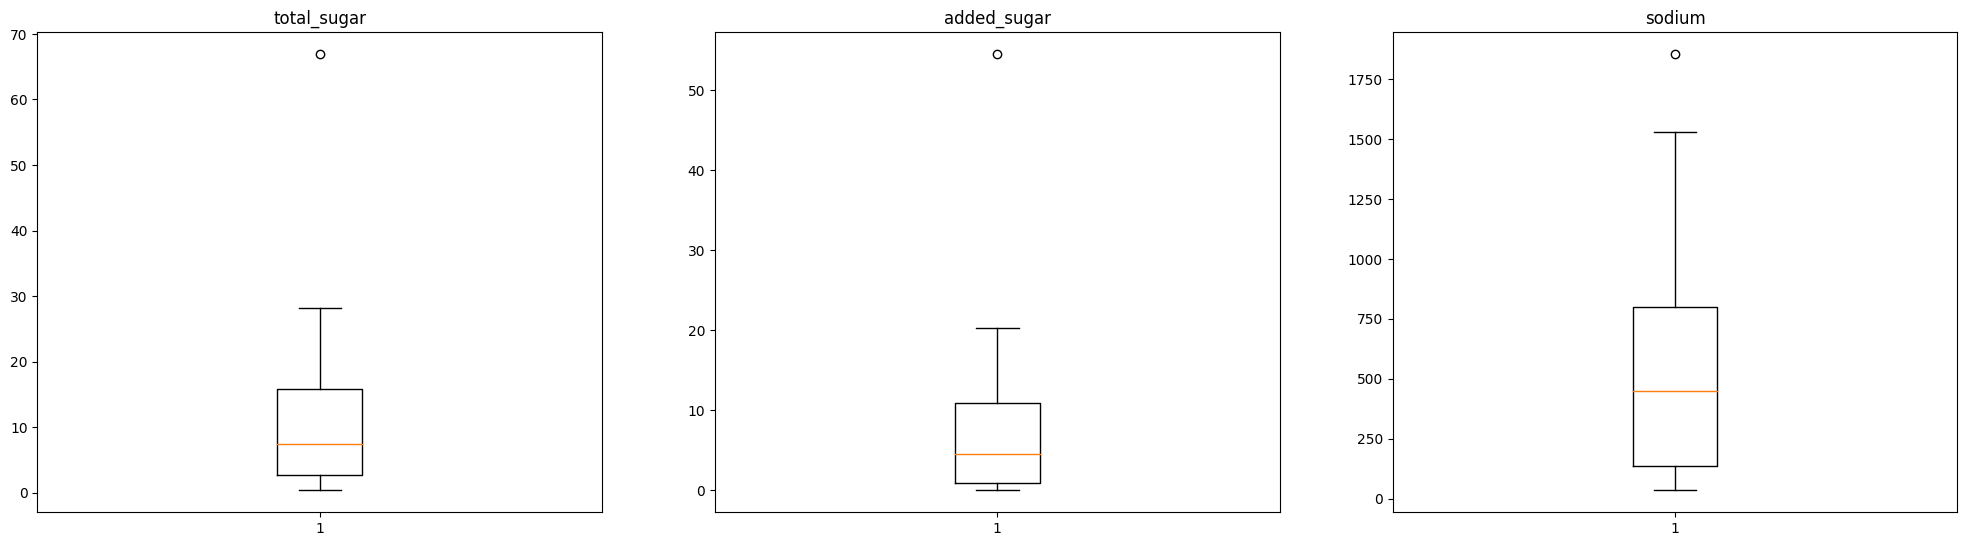

In [50]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("total_sugar")
plt.boxplot(df_new["total_sugar"])

plt.subplot(1,3,2)
plt.title("added_sugar")
plt.boxplot(df_new["added_sugar"])

plt.subplot(1,3,3)
plt.title("sodium")
plt.boxplot(df_new["sodium"])

plt.show()

In [51]:
for i in df.columns:
    if df[i].dtypes == "float64":
        print(i)

energy
protein
total_fat
sat_fat
trans_fat
chol
carbs
total_sugar
added_sugar
sodium


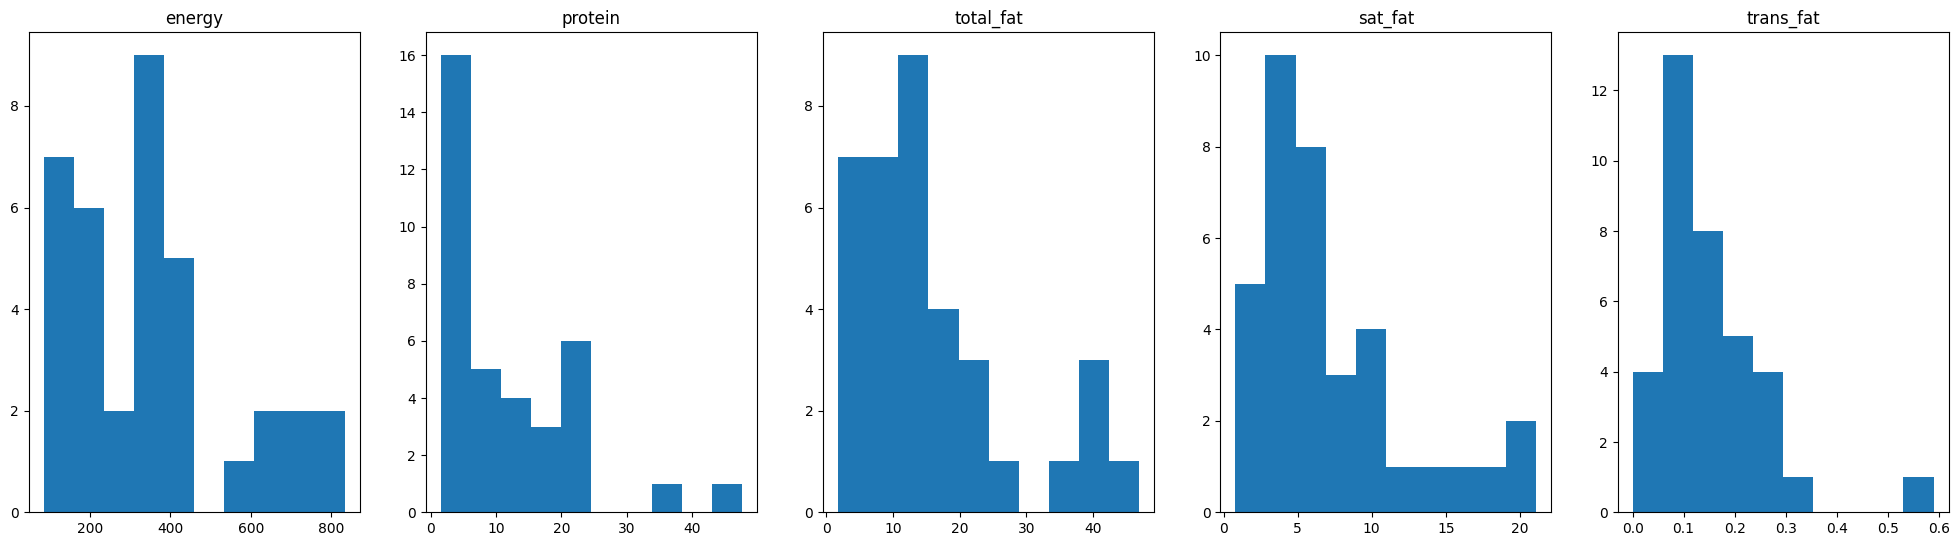

In [52]:
plt.subplot(1,5,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("energy")
plt.hist(df_new["energy"])

plt.subplot(1,5,2)
plt.title("protein")
plt.hist(df_new["protein"])

plt.subplot(1,5,3)
plt.title("total_fat")
plt.hist(df_new["total_fat"])

plt.subplot(1,5,4)
plt.title("sat_fat")
plt.hist(df_new["sat_fat"])

plt.subplot(1,5,5)
plt.title("trans_fat")
plt.hist(df_new["trans_fat"])

plt.show()

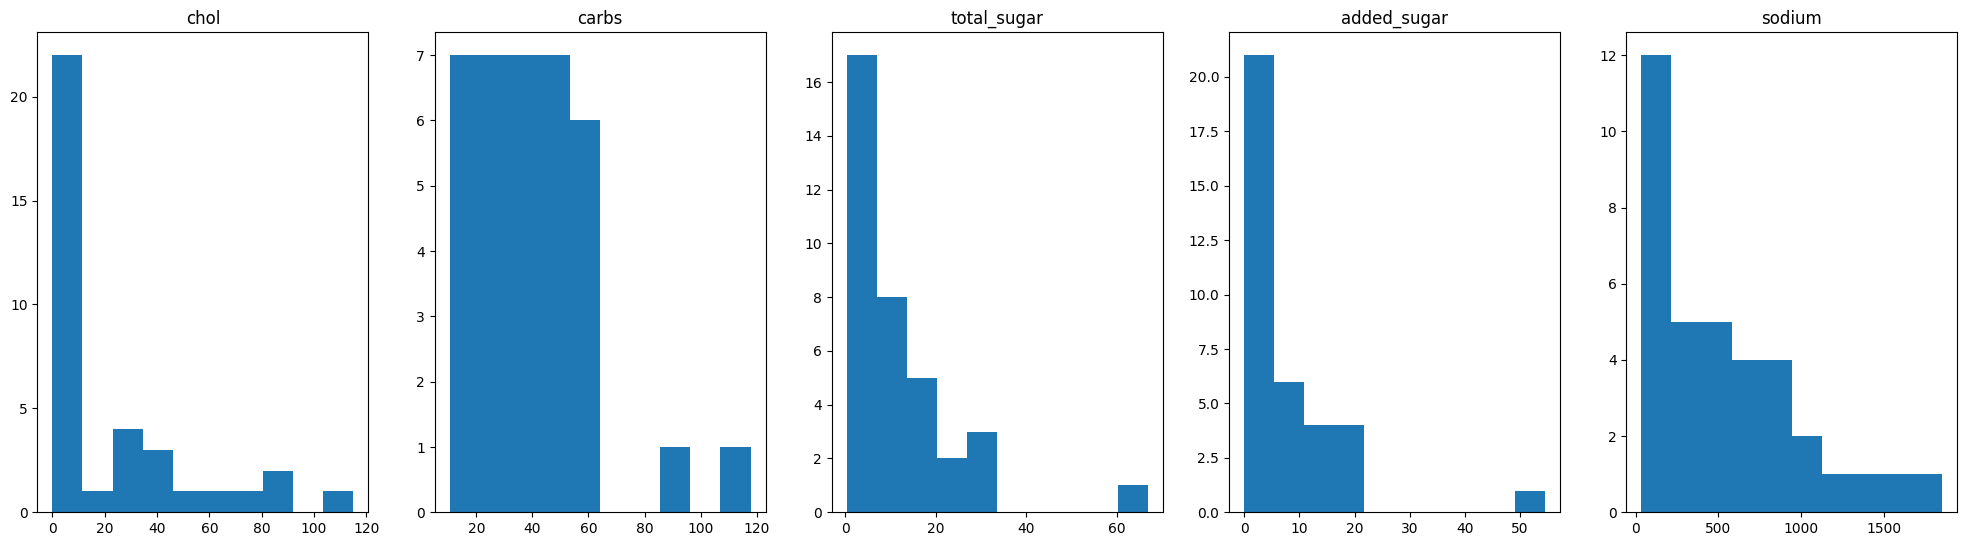

In [53]:
plt.subplot(1,5,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("chol")
plt.hist(df_new["chol"])

plt.subplot(1,5,2)
plt.title("carbs")
plt.hist(df_new["carbs"])

plt.subplot(1,5,3)
plt.title("total_sugar")
plt.hist(df_new["total_sugar"])

plt.subplot(1,5,4)
plt.title("added_sugar")
plt.hist(df_new["added_sugar"])

plt.subplot(1,5,5)
plt.title("sodium")
plt.hist(df_new["sodium"])

plt.show()

In [54]:
df_new["name"].value_counts()

name
Chicken McNuggets®               4
Our World Famous Fries®          3
Sundae (Strawberry)®             2
Sundae (Chocolate)®              2
Sundae (Chocolate Brownie)®      2
McFlurry (Choco Crunch)®         2
McFlurry (Oreo)®                 2
Butter Chicken Grilled Burger    1
McVeggie®                        1
Veg Maharaja Mac®                1
Spicy Paneer Wrap®               1
Spicy Chicken Wrap®              1
Soft Serve Cone®                 1
Pizza McPuff®                    1
McSpicy Paneer®                  1
McSwirl Chocolate®               1
Butter Paneer Grilled Burger     1
McSpicy Chicken®                 1
McEgg®                           1
McChicken®                       1
McAloo Tikki Burger®             1
Fillet-O-Fish®                   1
Dosa Masala Burger®              1
Chicken Maharaja Mac®            1
Cheesy Fries                     1
Veg Surprise Burger              1
Name: count, dtype: int64

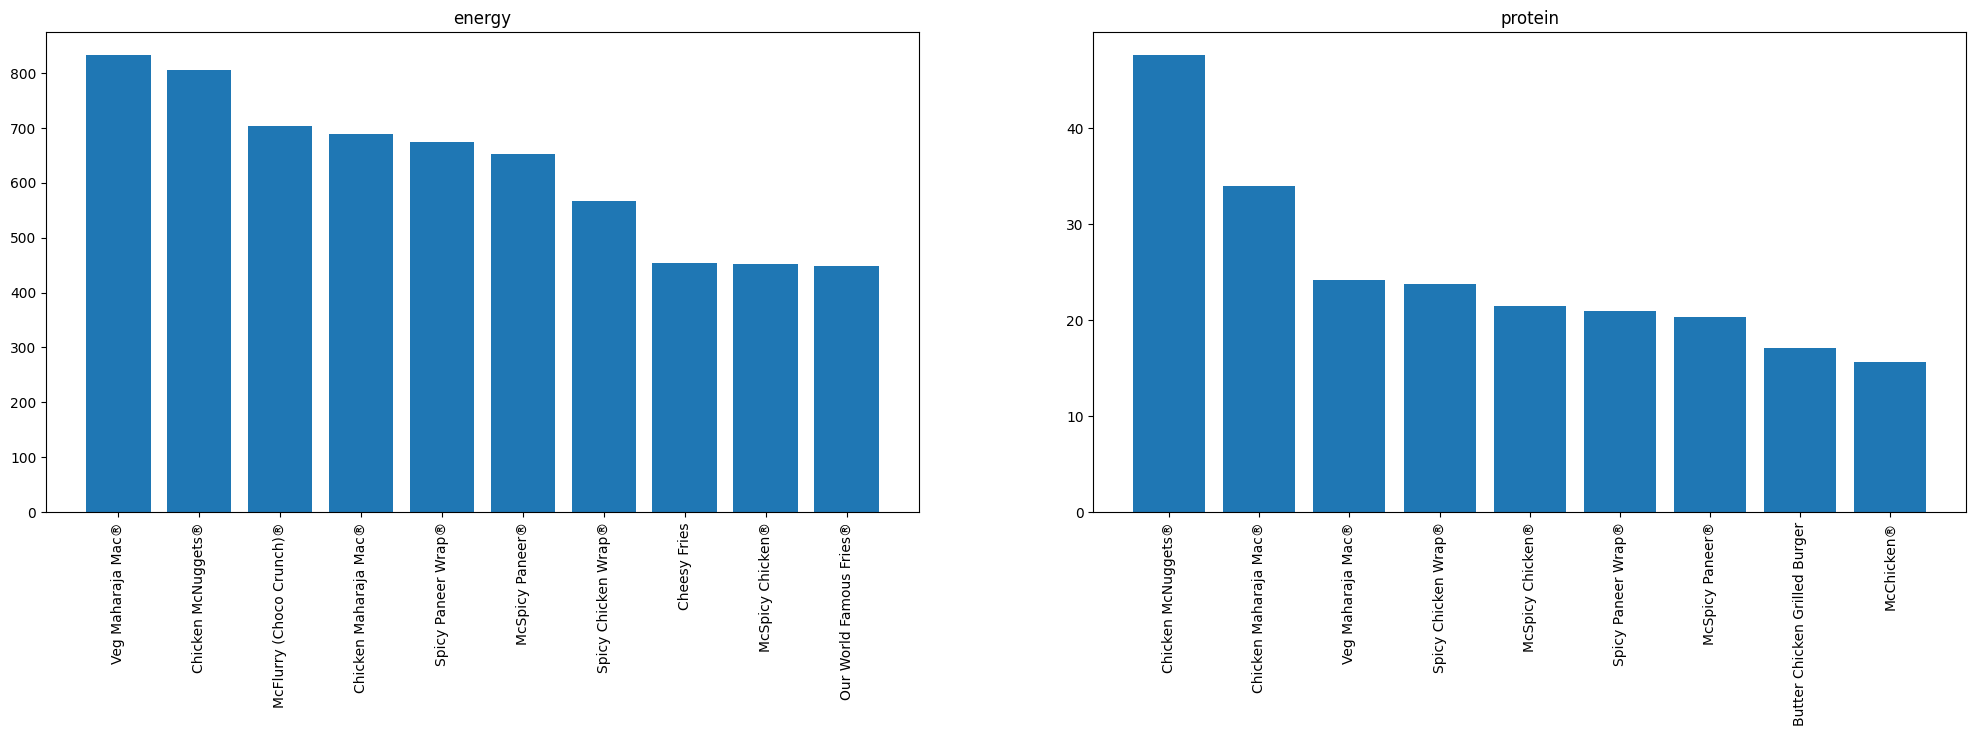

In [57]:
plt.subplot(1,2,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dfse = df_new.sort_values("energy",ascending=False).head(10)
plt.title("energy")
plt.xticks(rotation="vertical")
plt.bar(dfse.name,dfse.energy)

plt.subplot(1,2,2)
dfsp = df_new.sort_values("protein",ascending=False).head(10)
plt.title("protein")
plt.xticks(rotation="vertical")
plt.bar(dfsp.name,dfsp.protein)

plt.show()

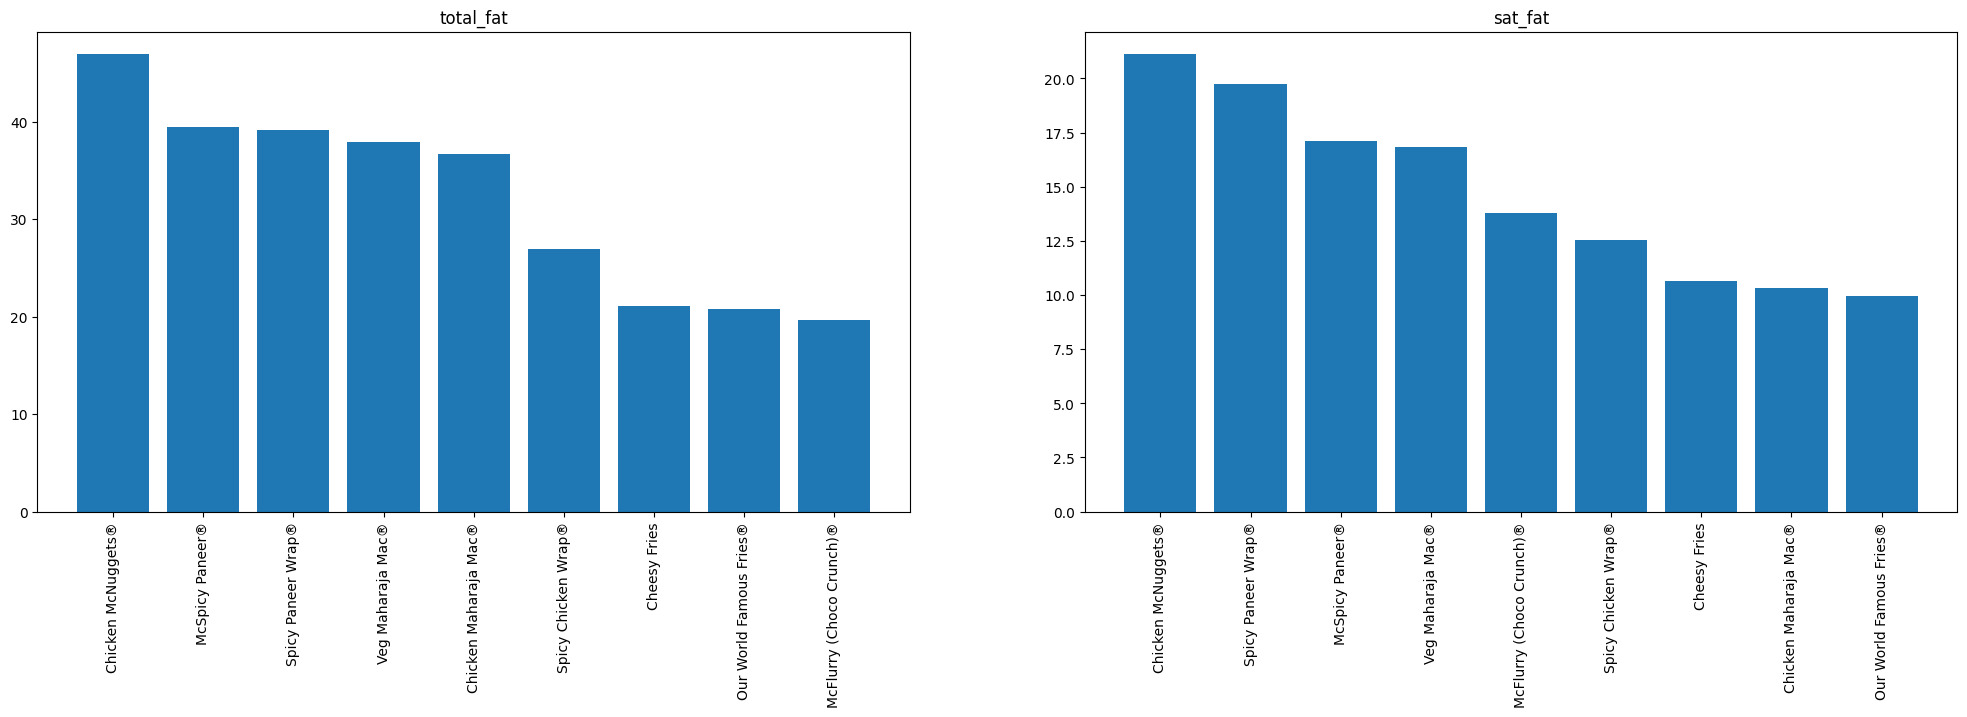

In [59]:
plt.subplot(1,2,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dfst = df_new.sort_values("total_fat",ascending=False).head(10)
plt.title("total_fat")
plt.xticks(rotation="vertical")
plt.bar(dfst.name,dfst.total_fat)

plt.subplot(1,2,2)
dfss = df_new.sort_values("sat_fat",ascending=False).head(10)
plt.title("sat_fat")
plt.xticks(rotation="vertical")
plt.bar(dfss.name,dfss.sat_fat)

plt.show()

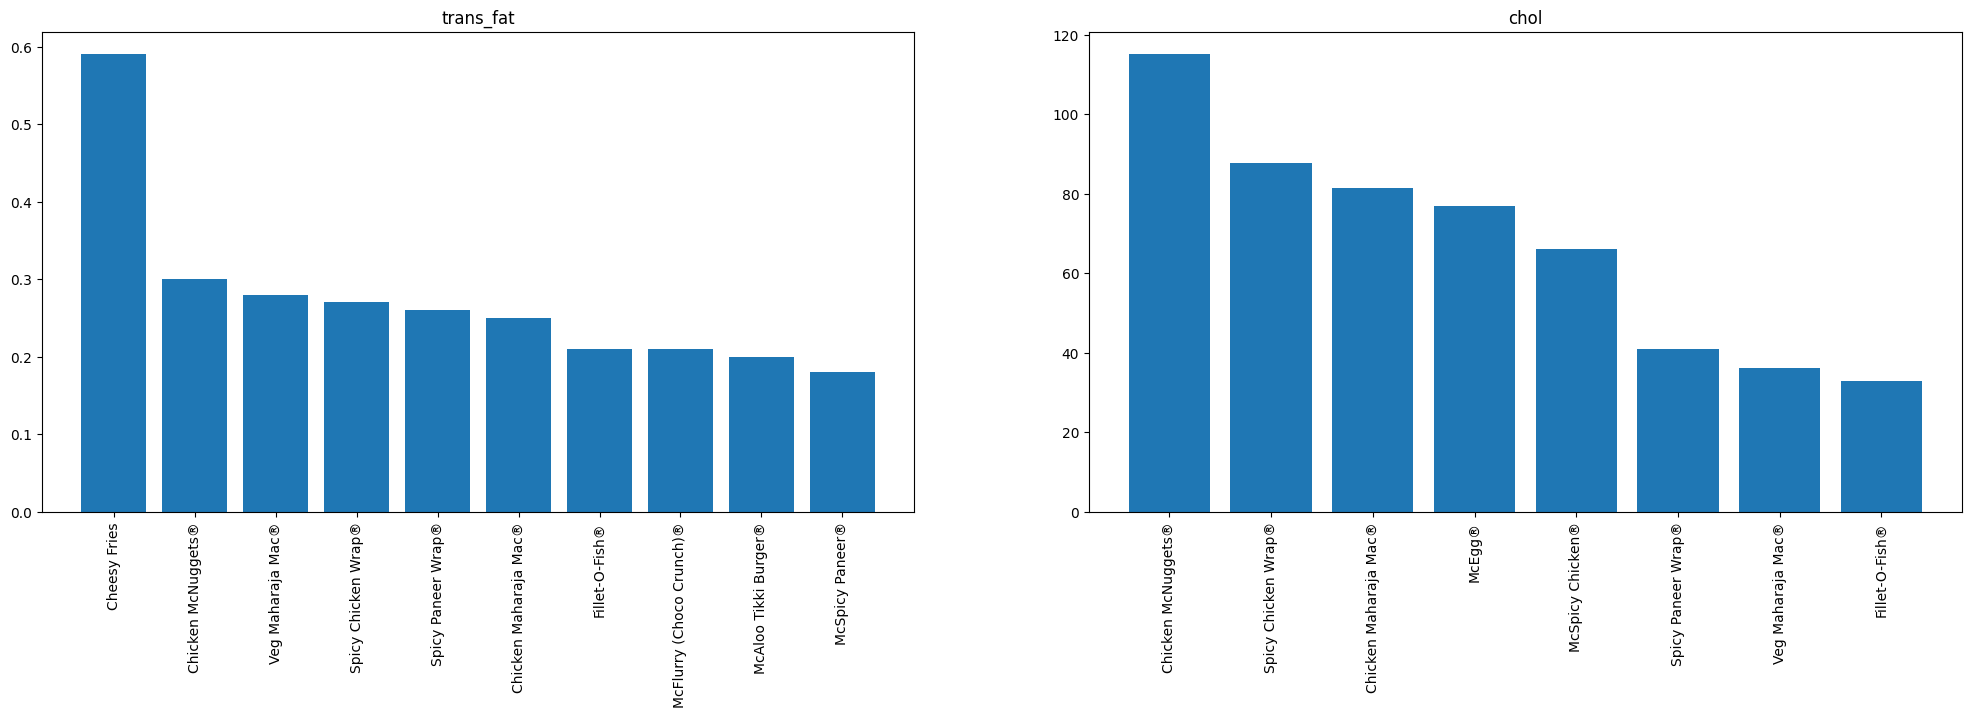

In [60]:
plt.subplot(1,2,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dft = df_new.sort_values("trans_fat",ascending=False).head(10)
plt.title("trans_fat")
plt.xticks(rotation="vertical")
plt.bar(dft.name,dft.trans_fat)

plt.subplot(1,2,2)
dfc = df_new.sort_values("chol",ascending=False).head(10)
plt.title("chol")
plt.xticks(rotation="vertical")
plt.bar(dfc.name,dfc.chol)

plt.show()

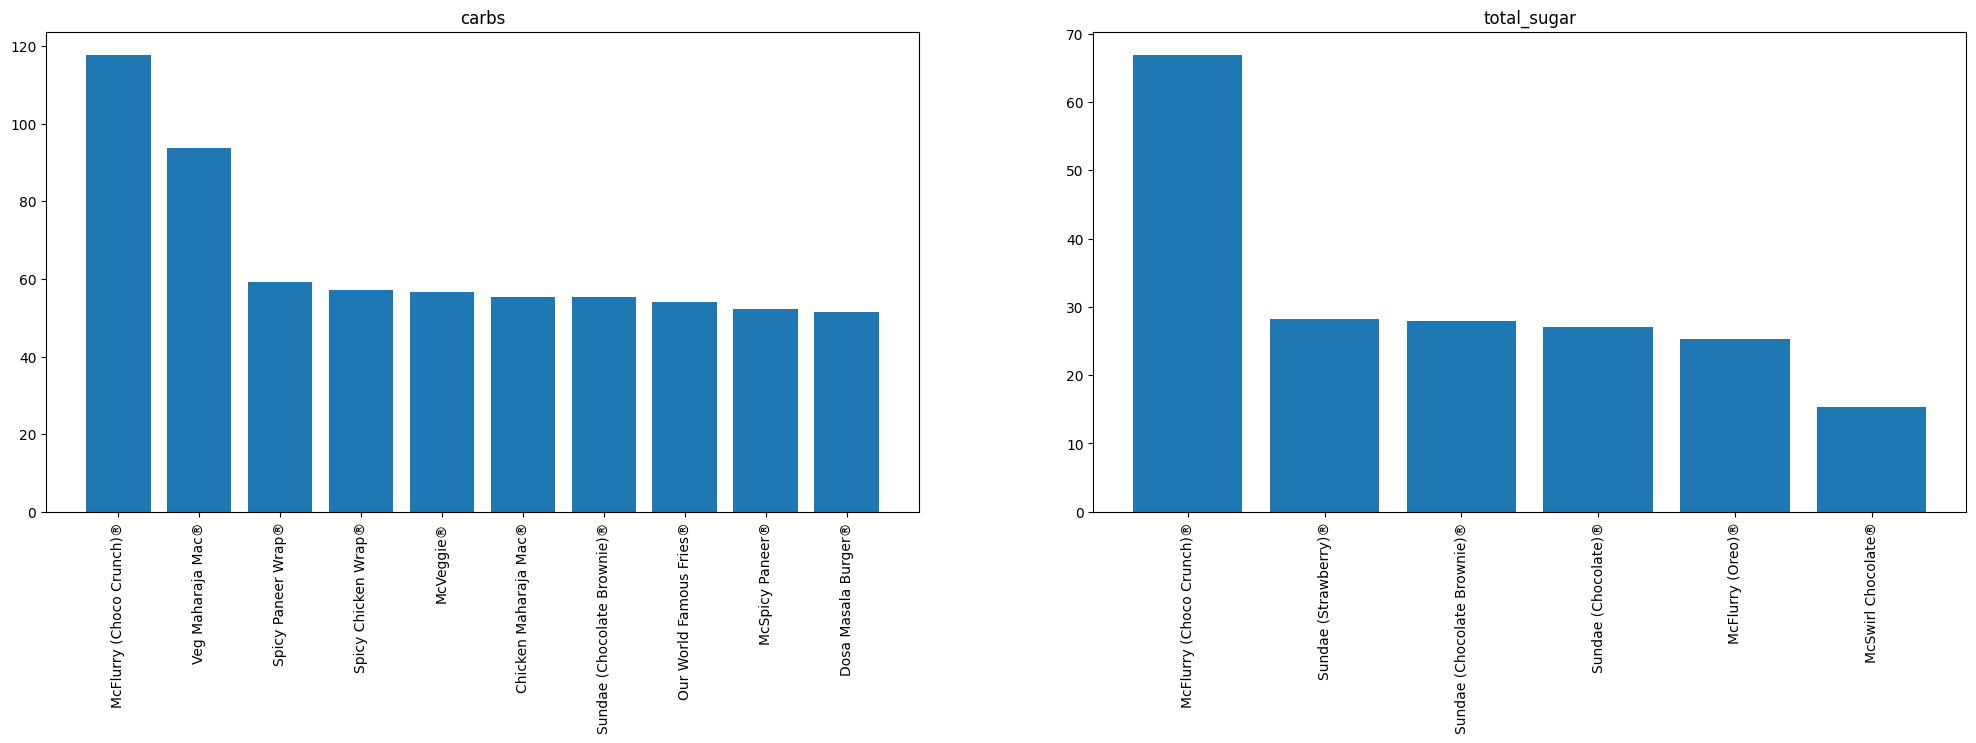

In [61]:
plt.subplot(1,2,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dfca = df_new.sort_values("carbs",ascending=False).head(10)
plt.title("carbs")
plt.xticks(rotation="vertical")
plt.bar(dfca.name,dfca.carbs)

plt.subplot(1,2,2)
dfts = df_new.sort_values("total_sugar",ascending=False).head(10)
plt.title("total_sugar")
plt.xticks(rotation="vertical")
plt.bar(dfts.name,dfts.total_sugar)

plt.show()

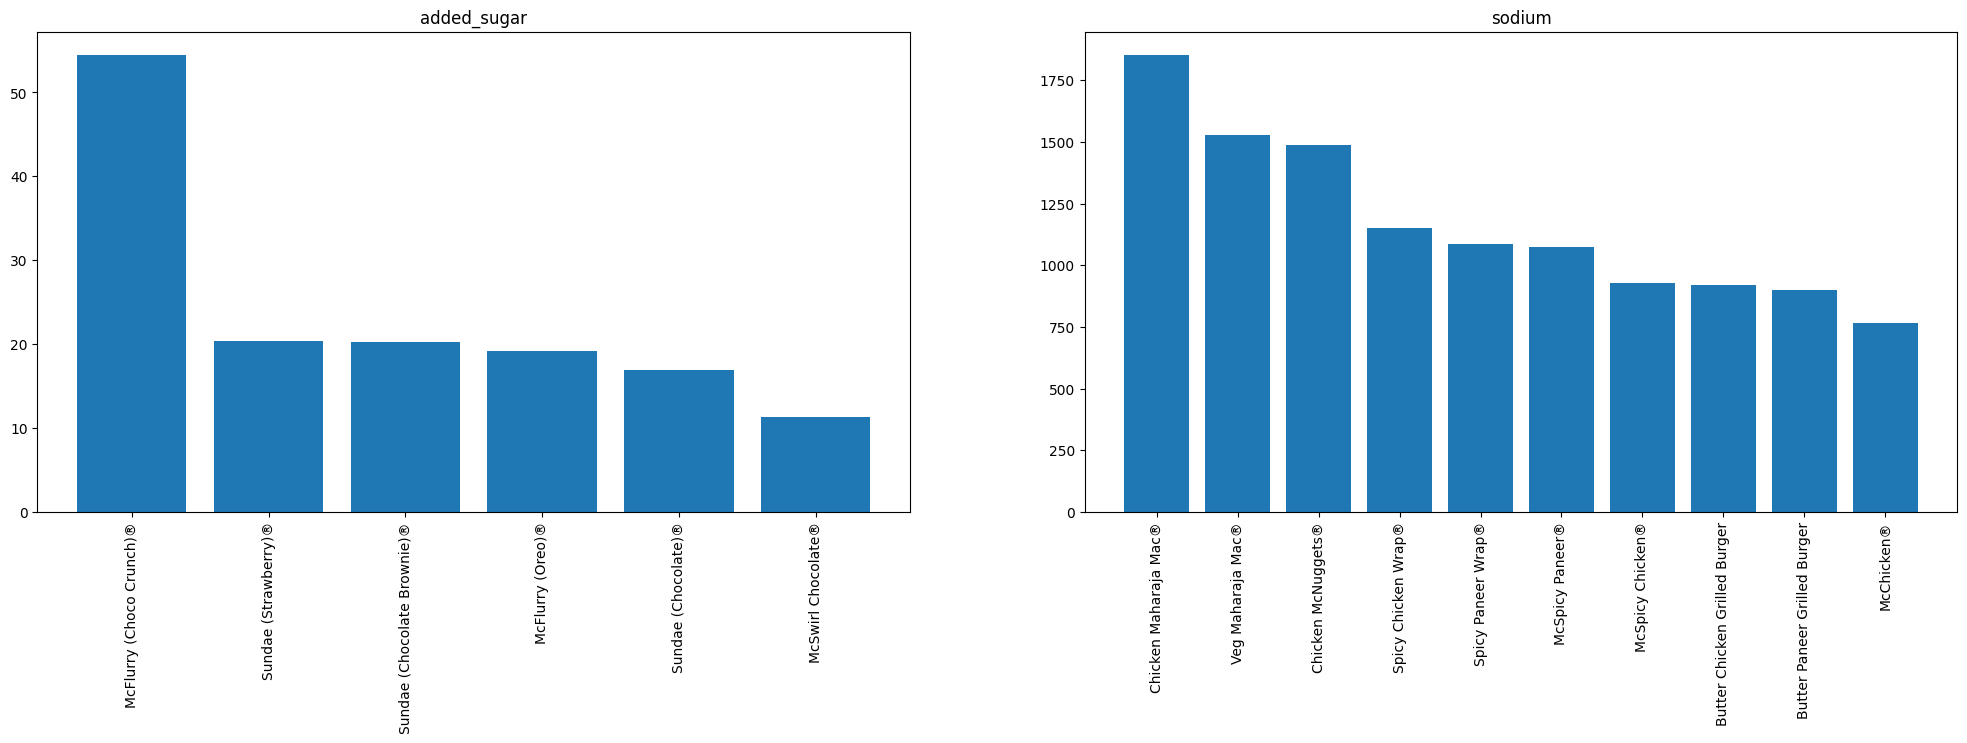

In [62]:
plt.subplot(1,2,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dfas = df_new.sort_values("added_sugar",ascending=False).head(10)
plt.title("added_sugar")
plt.xticks(rotation="vertical")
plt.bar(dfas.name,dfas.added_sugar)

plt.subplot(1,2,2)
dfsd = df_new.sort_values("sodium",ascending=False).head(10)
plt.title("sodium")
plt.xticks(rotation="vertical")
plt.bar(dfsd.name,dfsd.sodium)

plt.show()

In [63]:
df_new.head(10)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.410,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.150,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.100,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.690,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...
5,Chicken McNuggets®,64g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,169.68,10.03,9.544,4.45,0.06,24.66,10.50,0.32,0.00,313.25,"Bite-sized pieces of breaded, boneless chicken..."
6,Chicken McNuggets®,96g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,254.52,15.04,14.300,6.68,0.10,36.99,15.74,0.48,0.00,469.87,"Bite-sized pieces of breaded, boneless chicken..."
7,Chicken McNuggets®,320g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,806.10,47.60,46.900,21.11,0.30,115.00,49.88,1.70,0.00,1490.00,"Bite-sized pieces of breaded, boneless chicken..."
8,Chicken McNuggets®,144g,Chicken bites,Each bite is better than the last.,Cereal containing gluten,381.77,22.56,21.460,10.02,0.14,55.48,23.62,0.72,0.00,704.81,"Bite-sized pieces of breaded, boneless chicken..."
11,Dosa Masala Burger®,138g,"Whole wheat bun, Rasam mayo, Dosa masala aloo ...",A new taste of India.,"Cereal containing gluten, Milk, Soya",340.23,5.66,12.390,4.22,0.00,0.00,51.52,12.68,6.40,710.54,Turmeric-spiced mashed potato filling topped w...
12,Fillet-O-Fish®,136g,"Steamed regular bun, Chunky tartar mayo, Fish ...",This one's a great catch.,"Cereal containing gluten, Milk, Egg, Fish, Soya",348.11,15.44,14.160,5.79,0.21,32.83,38.85,5.58,3.54,530.54,Made with Alaskan Pollock sourced from sustain...


In [64]:
df_new["serving_size"].unique

<bound method Series.unique of 1         153g
2         142g
3         150g
4         296g
5         64g 
6         96g 
7         320g
8        144g 
11        138g
12        136g
16        146g
17        173g
18        115g
19     167.38g
20     94.29g 
21     86.79g 
22     147.38g
23        186g
24        199g
25      93.29g
26        168g
27        77g 
28        154g
29       109g 
30         87g
31      81.29g
32        257g
33        250g
34    110.79g 
35     155.08g
36     132.08g
37     91.79g 
38     132.08g
39     91.79g 
40        306g
41        132g
Name: serving_size, dtype: object>

In [78]:
df_new["serving_size"].replace('g','') 

1         153
2         142
3         150
4         296
5         64 
6         96 
7         320
8        144 
11        138
12        136
16        146
17        173
18        115
19     167.38
20     94.29 
21     86.79 
22     147.38
23        186
24        199
25      93.29
26        168
27        77 
28        154
29       109 
30         87
31      81.29
32        257
33        250
34    110.79 
35     155.08
36     132.08
37     91.79 
38     132.08
39     91.79 
40        306
41        132
Name: serving_size, dtype: object

In [79]:
df_new["serving_size"].unique()

array(['153', '142', '150', '296', '64 ', ' 96 ', ' 320', ' 144 ', '138',
       '136', '146', '173', '115', ' 167.38', '94.29 ', '86.79 ',
       ' 147.38', '186', '199', '93.29', '168', '77 ', ' 154', ' 109 ',
       '87', '81.29', '257', '250', '110.79 ', ' 155.08', ' 132.08',
       '91.79 ', '306', '132'], dtype=object)

In [81]:
df_new["serving_size"].astype(float)

1     153.00
2     142.00
3     150.00
4     296.00
5      64.00
6      96.00
7     320.00
8     144.00
11    138.00
12    136.00
16    146.00
17    173.00
18    115.00
19    167.38
20     94.29
21     86.79
22    147.38
23    186.00
24    199.00
25     93.29
26    168.00
27     77.00
28    154.00
29    109.00
30     87.00
31     81.29
32    257.00
33    250.00
34    110.79
35    155.08
36    132.08
37     91.79
38    132.08
39     91.79
40    306.00
41    132.00
Name: serving_size, dtype: float64

In [82]:
for i in df_new.columns:
    if df_new[i].dtypes == "float64":
        print(i)

serving_size
energy
protein
total_fat
sat_fat
trans_fat
chol
carbs
total_sugar
added_sugar
sodium


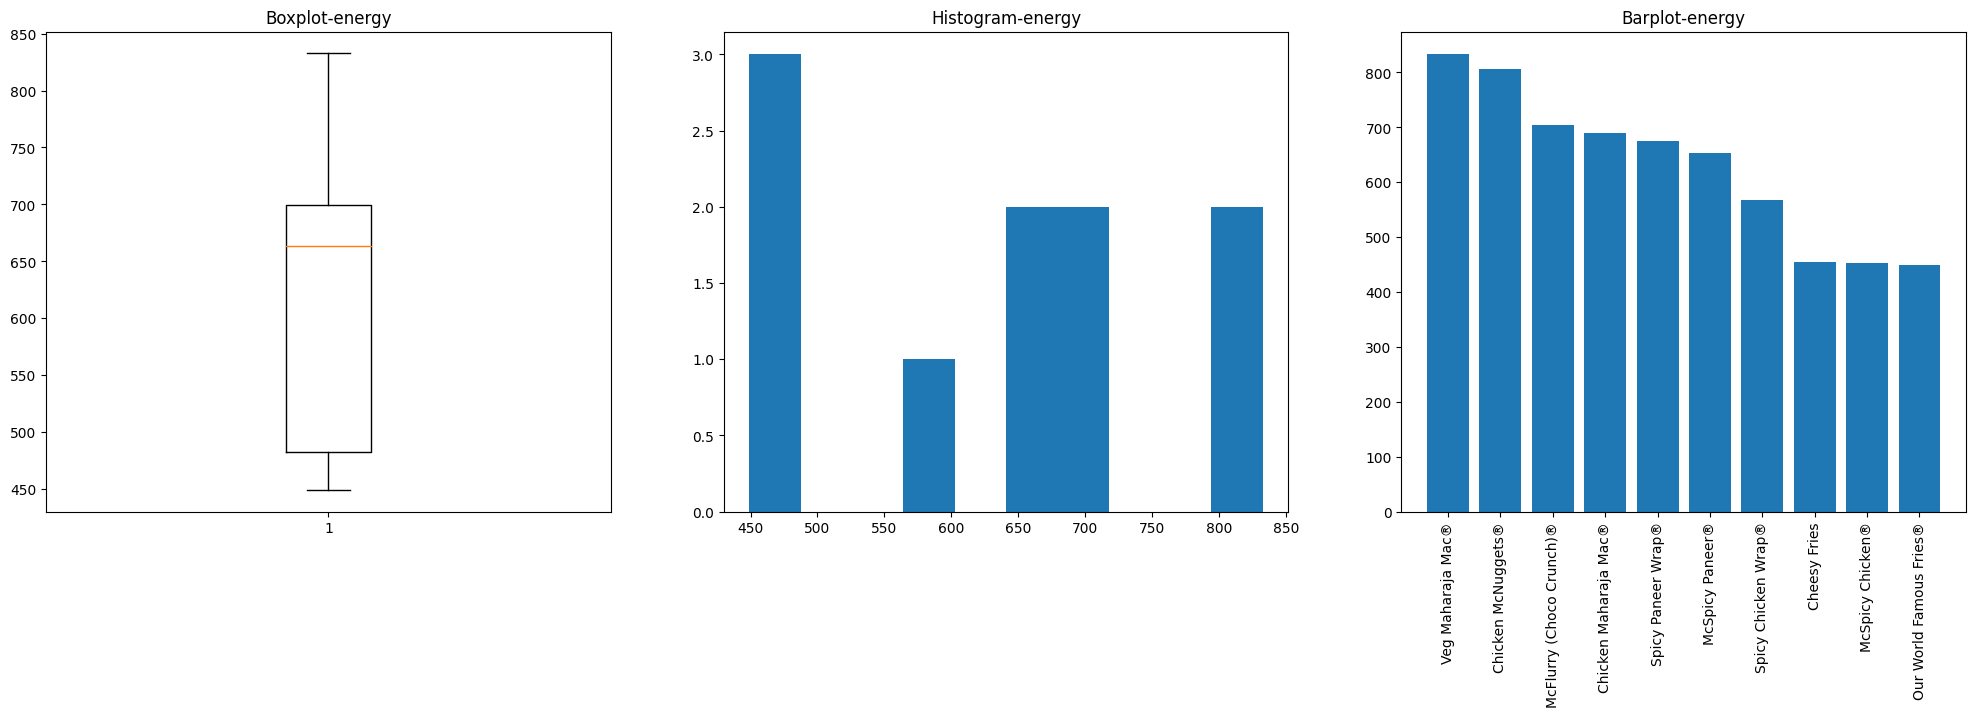

In [91]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
dfe = df_new.sort_values("energy",ascending=False).head(10)
plt.title("Boxplot-energy")
plt.boxplot(dfe.energy)

plt.subplot(1,3,2)
plt.title("Histogram-energy")
plt.hist(dfe.energy)

plt.subplot(1,3,3)
plt.title("Barplot-energy")
plt.xticks(rotation="vertical")
plt.bar(dfe.name,dfe.energy)

plt.show()

In [ ]:
df_new["serving_size"].isnull().sum()

0

<Axes: >

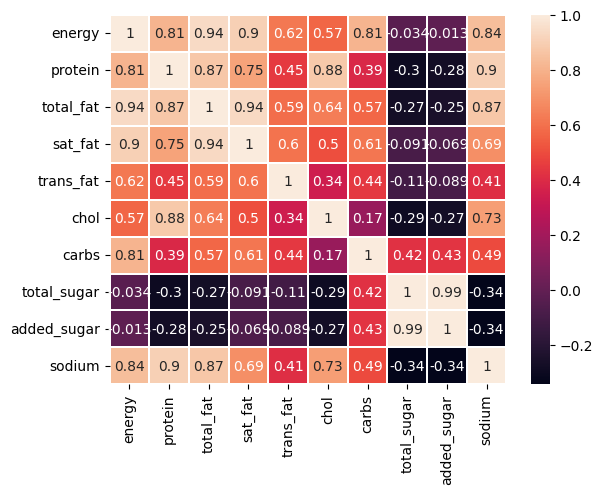

In [69]:
corr = df_new.select_dtypes(include=[np.number]).corr()
sb.heatmap(corr,linewidths=0.1,annot =True)

In [84]:
x = df_new[["serving_size","protein","total_fat","sat_fat","trans_fat","chol","carbs","total_sugar","added_sugar","sodium"]]
y = df_new["energy"]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (28, 10)
x_test (8, 10)
y_train (28,)
y_test (8,)


In [86]:
linear_reg = LinearRegression().fit(x_train,y_train)

In [88]:
linear_reg.score(x_train,y_train)

0.9982247970126955

In [89]:
linear_reg.coef_

array([-9.01448371e-02,  3.26520716e+00,  8.08251063e+00,  1.11525419e+00,
        1.11717609e+02,  7.34221054e-02,  4.31519069e+00, -1.28960116e+00,
        1.04050757e+00,  1.47194470e-02])

In [90]:
linear_reg.intercept_

0.2126574274509494

In [92]:
x_constant = sm.add_constant(x_train)
model=sm.OLS(y_train,x_constant)

In [93]:
result=model.fit()

In [94]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     955.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.47e-21
Time:                        18:59:41   Log-Likelihood:                -100.66
No. Observations:                  28   AIC:                             223.3
Df Residuals:                      17   BIC:                             238.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2127      7.291      0.029   